# Load data

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.Series()
df['raw'] = pd.read_csv('./data/movie_metadata.csv')
df['raw'].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# Dataframe created containing only numeric values for use in the linear regression section
df['numeric'] = df['raw']._get_numeric_data()
df['numeric'].head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0


# Pre processing

In [4]:
print('Data for Linear Classification')
print('Amount of lines containing N/A:\t\t{}'.format(df['raw'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['raw'].isnull().values.sum()/df['raw'].shape[0]))

Data for Linear Classification
Amount of lines containing N/A:		2698
Percent of lines containing N/A:	53.50%


In [5]:
print('Data for Linear Regression')
print('Amount of lines containing N/A:\t\t{}'.format(df['numeric'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['numeric'].isnull().values.sum()/df['numeric'].shape[0]))

Data for Linear Regression
Amount of lines containing N/A:		2059
Percent of lines containing N/A:	40.83%


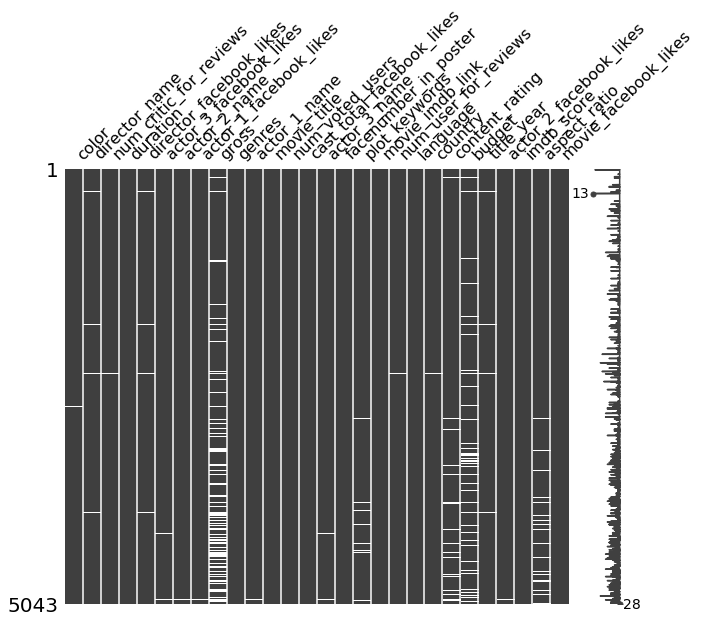

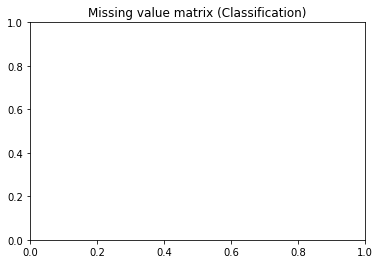

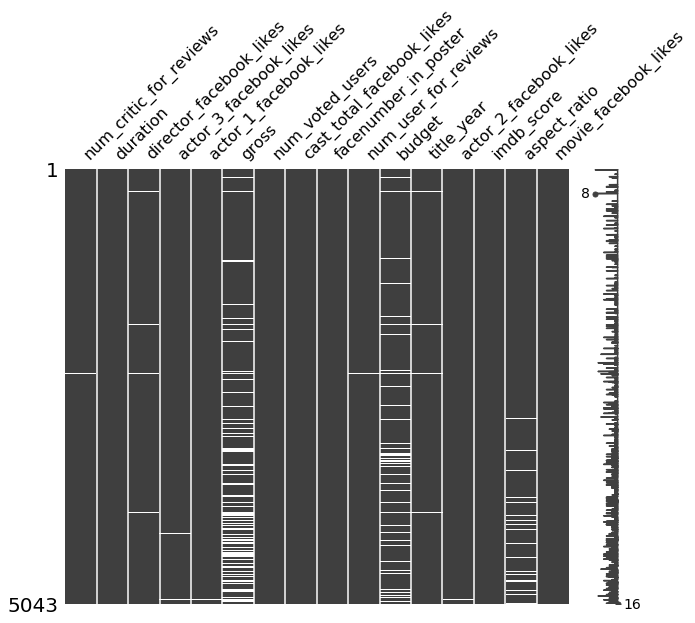

In [6]:
msno.matrix(df['raw'],figsize=(10,8))
plt.title('Missing value matrix (Classification)');
msno.matrix(df['numeric'],figsize=(10,8))
plt.title('Missing value matrix (Regression)')

The N/A mostly lies in the actor 1 facebook likes column and the budget column.  
The approach will be to investigate the result of just removing lines, and the result when the 2  columns mentioned above is removed before the N/A lines are removed.  
Also the link to imdb should be removed.

In [7]:
# Classification
del df['raw']['movie_imdb_link']
del df['raw']['movie_title']
del df['raw']['plot_keywords']
df['no_na_row'] = df['raw'].dropna()
df['no_na_col'] = pd.DataFrame.copy(df['raw'])
del df['no_na_col']['budget']

#Removing actor 1 facebook likes turn out to help very little.
#del df['no_na_col']['actor_1_facebook_likes']del df['no_na_col']['budget']del df['no_na_col']['budget']del df['no_na_col']['budget']

# Regression
df['numeric_row_na'] = df['numeric'].dropna()
df['numeric_col_na'] = pd.DataFrame.copy(df['numeric'])
#del df['numeric_col_na']['gross']
del df['numeric_col_na']['budget']

print('Classification')
print('Before columns are removed')
print('Amount of lines containing N/A:\t\t{}'.format(df['raw'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['raw'].isnull().values.sum()/df['raw'].shape[0]))
print('\nAfter columns are removed')
print('Amount of lines containing N/A:\t\t{}'.format(df['no_na_col'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['no_na_col'].isnull().values.sum()/df['no_na_col'].shape[0]))

print('Regression')
print('Before columns are removed')
print('Amount of lines containing N/A:\t\t{}'.format(df['numeric'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['numeric'].isnull().values.sum()/df['numeric'].shape[0]))
print('\nAfter columns are removed')
print('Amount of lines containing N/A:\t\t{}'.format(df['numeric_col_na'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['numeric_col_na'].isnull().values.sum()/df['numeric_col_na'].shape[0]))

df['no_na_col'] = df['no_na_col'].dropna()
df['numeric_col_na'] = df['numeric_col_na'].dropna()

Classification
Before columns are removed
Amount of lines containing N/A:		2545
Percent of lines containing N/A:	50.47%

After columns are removed
Amount of lines containing N/A:		2053
Percent of lines containing N/A:	40.71%
Regression
Before columns are removed
Amount of lines containing N/A:		2059
Percent of lines containing N/A:	40.83%

After columns are removed
Amount of lines containing N/A:		1567
Percent of lines containing N/A:	31.07%


Now the data is cleaned, the text features should be k-coded

In [8]:
#find all numeric column labels
numeric_columns = df['no_na_row'].select_dtypes(include=[np.number]).columns.tolist()

#standardize each column
for column in numeric_columns:
    df['no_na_row'][column] = ((df['no_na_row'][column]-df['no_na_row'][column].mean())/df['no_na_row'][column].std())


numeric_columns = df['no_na_col'].select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_columns:
    df['no_na_col'][column] = ((df['no_na_col'][column]-df['no_na_col'][column].mean())/df['no_na_col'][column].std())

df['numeric_std'] = ((df['numeric_col_na'] - df['numeric_col_na'].mean()) / df['numeric_col_na'].std())

/home/mattias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df['no_na_row'].loc[3]

color                                       Color
director_name                   Christopher Nolan
num_critic_for_reviews                    5.23044
duration                                  2.37625
director_facebook_likes                   6.92024
actor_3_facebook_likes                    11.7554
actor_2_name                       Christian Bale
actor_1_facebook_likes                    1.24383
gross                                     5.63239
genres                            Action|Thriller
actor_1_name                            Tom Hardy
num_voted_users                           6.84005
cast_total_facebook_likes                 4.98881
actor_3_name                 Joseph Gordon-Levitt
facenumber_in_poster                    -0.674405
num_user_for_reviews                      5.75623
language                                  English
country                                       USA
content_rating                              PG-13
budget                                   0.903855


Removed columns:  
IMDB_link  
movie_title 


In [10]:
df['no_na_row']['director_name'].value_counts().head()

Steven Spielberg    25
Clint Eastwood      19
Woody Allen         19
Ridley Scott        17
Martin Scorsese     16
Name: director_name, dtype: int64

In [11]:
#Maps atribute color as one hot notation 
d = {'Color': 1, ' Black and White': 0}
df['no_na_col']['Color'] = df['no_na_col']['color'].map(d)
df['no_na_row']['Color'] = df['no_na_row']['color'].map(d)
del df['no_na_col']['color']
del df['no_na_row']['color']

#Maps single column in one hot notation
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['language'].str.get_dummies()],axis=1)
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['country'].str.get_dummies()],axis=1)
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['content_rating'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['language'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['country'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['content_rating'].str.get_dummies()],axis=1)

#Maps multiword attribute to one hot notation
#df['no_na_row'] = pd.concat([df['no_na_row'], df['no_na_row']['plot_keywords'].str.get_dummies(sep='|')],axis=1)
df['no_na_row'] = pd.concat([df['no_na_row'], df['no_na_row']['genres'].str.get_dummies(sep='|')],axis=1)
#df['no_na_col'] = pd.concat([df['no_na_col'], df['no_na_col']['plot_keywords'].str.get_dummies(sep='|')],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'], df['no_na_col']['genres'].str.get_dummies(sep='|')],axis=1)

#Maps multiple columns (actor 1,2,3) into "was he in the movie" one hot notation
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['actor_2_name'].map(str).str.cat(df['no_na_row']['actor_1_name'].map(str),sep='|').str.cat(df['no_na_row']['actor_3_name'].map(str),sep='|').str.get_dummies(sep='|')],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['actor_2_name'].map(str).str.cat(df['no_na_col']['actor_1_name'].map(str),sep='|').str.cat(df['no_na_col']['actor_3_name'].map(str),sep='|').str.get_dummies(sep='|')],axis=1)

#clean up
df['no_na_col'] = df['no_na_col'].drop(['genres','actor_1_name','actor_2_name','actor_3_name','language',
                    'country','content_rating' ],axis=1)
df['no_na_row'] = df['no_na_row'].drop(['genres','actor_1_name','actor_2_name','actor_3_name','language',
                    'country','content_rating'],axis=1)

/home/mattias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


For clustering, a version is made with a column "is steven spielberg director", and for the regression, a one hut of the directors are made.

In [12]:
#copy the dataframe to two new dataframes
df['c_no_na_row'] = pd.DataFrame.copy(df['no_na_row'])
df['c_no_na_col'] = pd.DataFrame.copy(df['no_na_col'])


#onehut of the director name for the row versions
df['c_no_na_row']['SS_director'] = (df['no_na_row']['director_name'].str.contains('Steven Spielberg', na=0))
df['r_no_na_row'] = pd.concat([df['no_na_row'], pd.get_dummies(df['no_na_row']['director_name'],prefix='Director_')], axis=1)

#onehot of the director for the column versions
df['c_no_na_col']['SS_director']=(df['no_na_col']['director_name'].str.contains('Steven Spielberg', na=0))
df['r_no_na_col'] = pd.concat([df['no_na_col'], pd.get_dummies(df['no_na_col']['director_name'],prefix='Director_')], axis=1)

#change false/true to 0/1
df['c_no_na_col']['SS_director'] = df['c_no_na_col']['SS_director'].astype(int)
df['c_no_na_row']['SS_director'] = df['c_no_na_row']['SS_director'].astype(int)

# drop column director name
del df['r_no_na_col']['director_name']
del df['c_no_na_col']['director_name']
del df['r_no_na_row']['director_name']
del df['c_no_na_row']['director_name']

Steven Spielberg is the director which occours most frequently in the dataset. It will be the focus to for the clustering, to cluster whether or not he directed the movie. There will be created 2 datasets, one for clustering and one for the regression part. One dataset will consist of a 

# Regression

The dataset used in creating a regression model are:
- df['r_no_na_col']

Where 'r' is for regression, 'no_na' for non containing N/A's. The last col indicates if the dataset has dropped two columns containing many N/A's and then all N/A's for all rows. The dataset has been interpreted and standardized.

In [ ]:
#print("Dataset containing all columns:")
#df['r_no_na_row'].head()

In [13]:
print("Dataset used for Linear Regression model:")
df['numeric_std'].head()

Dataset used for Linear Regression model:


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.590893,3.046030,-0.257157,0.064153,-0.426733,10.312671,5.296292,-0.335104,-0.673437,6.793812,0.588762,-0.224989,1.358669,-0.935101,1.151650
1,1.141206,2.644021,-0.068780,0.143220,2.143809,3.767580,2.500073,1.993803,-0.673437,2.279827,0.387192,0.693896,0.596517,0.697025,-0.426367
2,3.599415,1.706000,-0.257157,-0.314276,0.232380,2.181297,1.183764,0.032354,-0.182514,1.673323,1.193472,-0.347764,0.310711,0.697025,3.638224
3,5.328356,2.420683,7.103922,12.139545,1.286961,5.780380,7.035628,5.119760,-0.673437,5.916369,0.891117,4.763763,1.930282,0.697025,7.415903
5,2.452251,0.991318,-0.098224,-0.113065,-0.450461,0.338413,0.754788,-0.493572,-0.182514,1.036990,0.891117,-0.293725,0.120173,0.697025,0.721282


## Problem formulation
Since the purpose of the website IMDB is to give a score to movies, a model is created for predicting the score of a movie from metadata of a movie. The actual values to predict are stored in the column 'imdb_score', all other columns in the dataset are metadata for different movies.

In [14]:
# Split dataset into input data and prediction data
X = df['numeric_std'].loc[:, df['numeric_std'].columns != 'imdb_score']
y = df['numeric_std']['imdb_score']
print("Shape 'numeric_std':\n", X.shape)

# Dataset containing without column dropped
#X_row = df['r_no_na_row'].loc[:, df['r_no_na_row'].columns != 'imdb_score']
#y_row = df['r_no_na_row']['imdb_score']
#print("Shape 'row':\n", X_row.shape)

Shape 'numeric_std':
 (4032, 14)


## Apply linear regression with forward selection
Is transforming or combining attributes useful?
- It can be useful to plot the residual error vs. the attribute.

First the datasets containing input data and prediction data are split into a training partition and a test partition each. The test partitions are 0.25 % of the datasets and are saved until a final performance evaluation of the created regression model.

The trainings partitions are now used in forward feature selection, where models are created and evaluated with a subset of features, for selecting the best features of the input training dataset for creating a model with the lowest squared error in predicting the prediction training dataset.

DEBUG - TIMESTAMP: 2017-11-14 00:47:13 - CV: 1/5
DEBUG - TIMESTAMP: 2017-11-14 00:47:13 - Squared error no input done!
DEBUG - TIMESTAMP: 2017-11-14 00:47:13 - Squared error all input done!
DEBUG - TIMESTAMP: 2017-11-14 00:47:13 - Features selected
DEBUG - TIMESTAMP: 2017-11-14 00:47:13 - Model trained using Linear Regression with forward feature selection
Train on 3225 samples, validate on 807 samples
Epoch 1/20
3225/3225 [==============================] - 0s - loss: 1.2786 - acc: 0.0000e+00 - val_loss: 1.0678 - val_acc: 0.0000e+00
Epoch 2/20
3225/3225 [==============================] - 0s - loss: 1.2077 - acc: 0.0000e+00 - val_loss: 1.0274 - val_acc: 0.0000e+00
Epoch 3/20
3225/3225 [==============================] - 0s - loss: 1.1493 - acc: 0.0000e+00 - val_loss: 0.9908 - val_acc: 0.0000e+00
Epoch 4/20
3225/3225 [==============================] - 0s - loss: 1.0982 - acc: 0.0000e+00 - val_loss: 0.9576 - val_acc: 0.0000e+00
Epoch 5/20
3225/3225 [==============================] - 0s - l

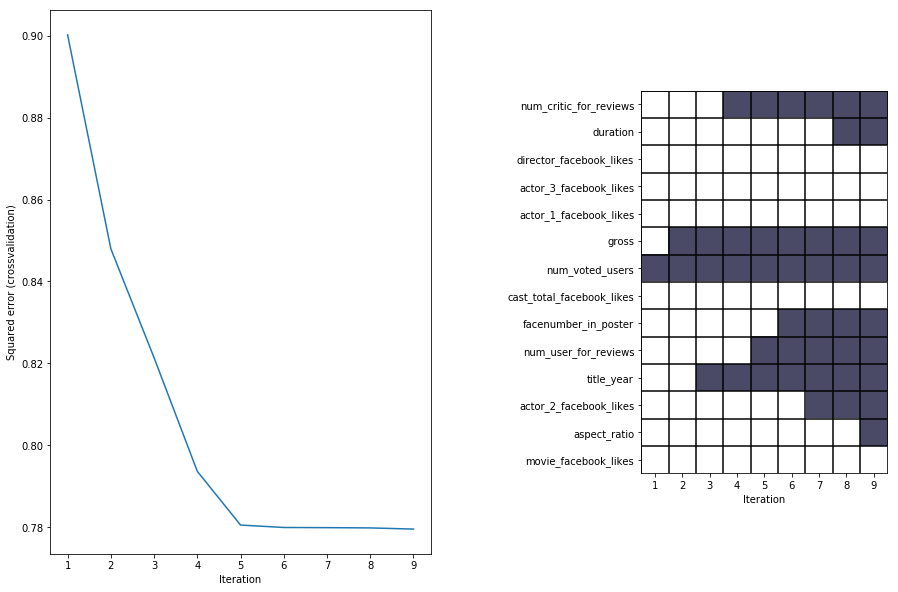

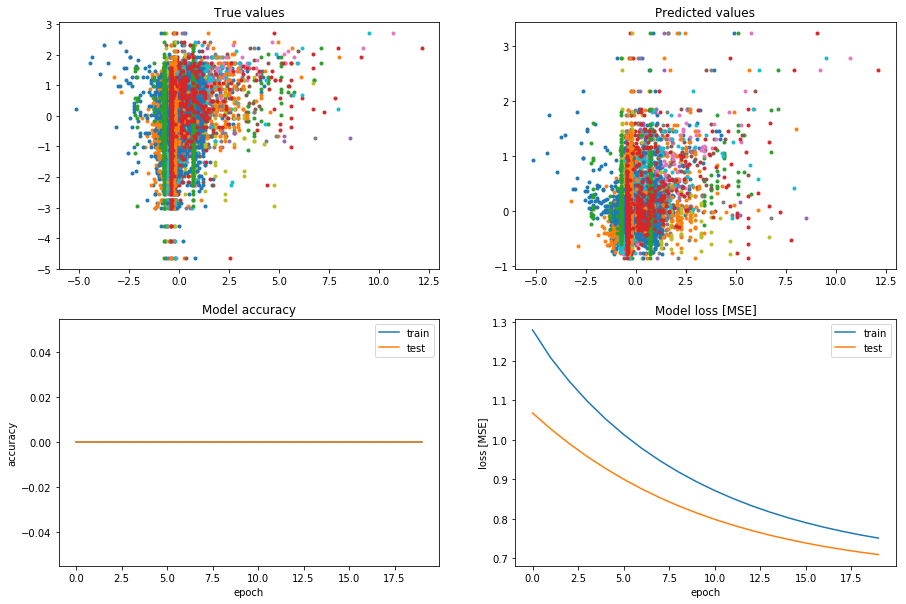

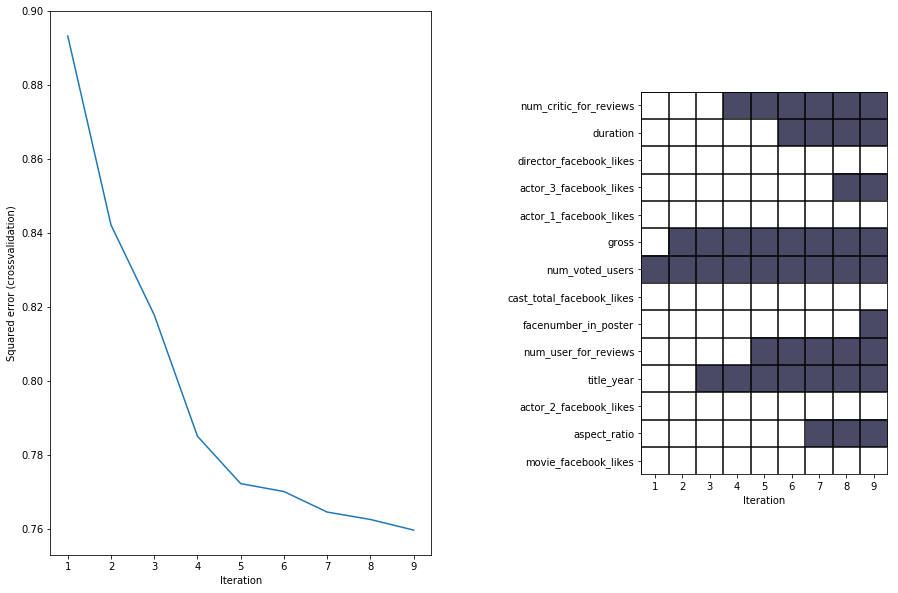

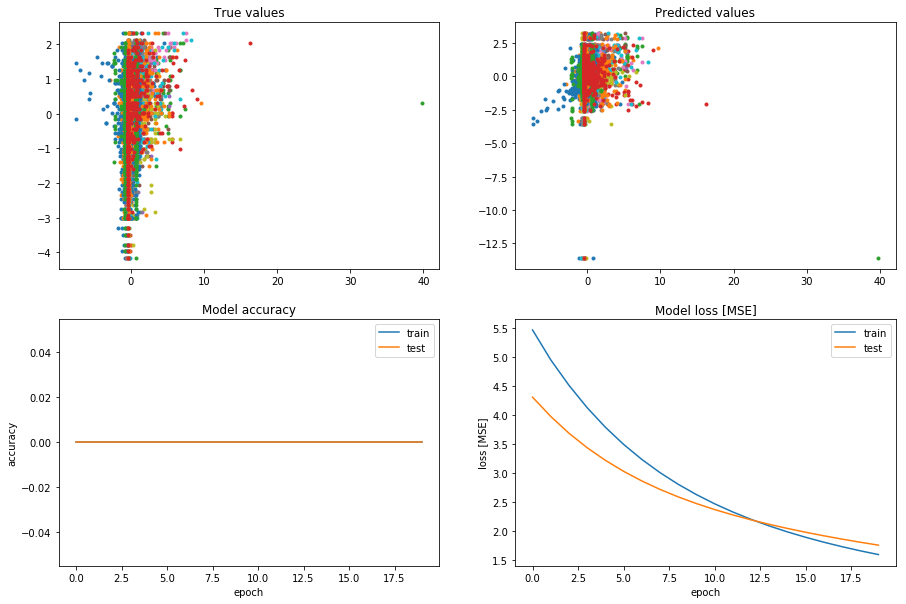

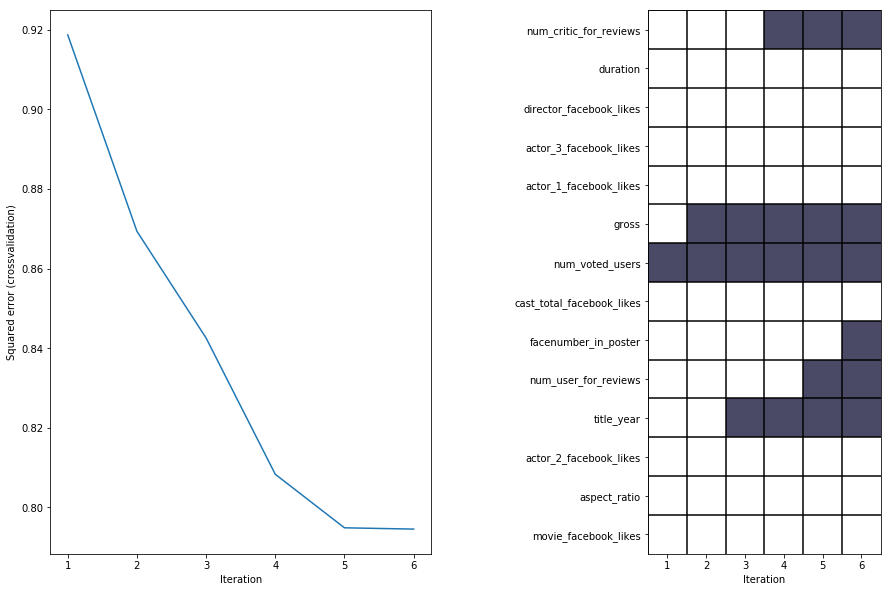

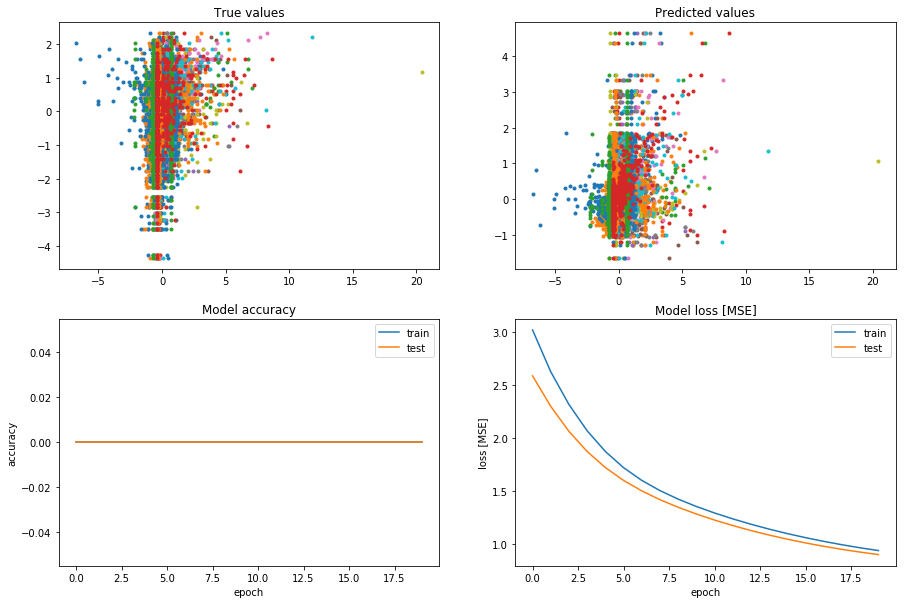

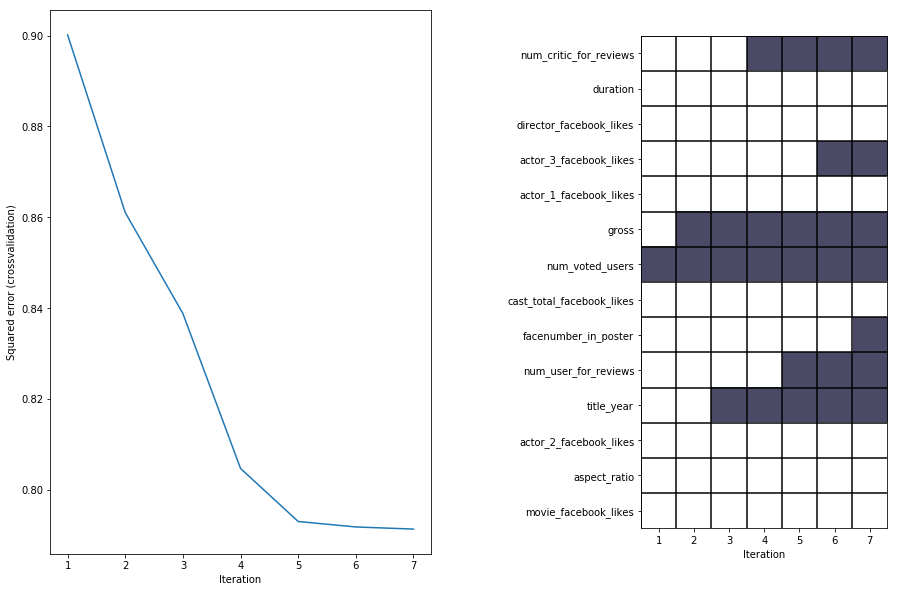

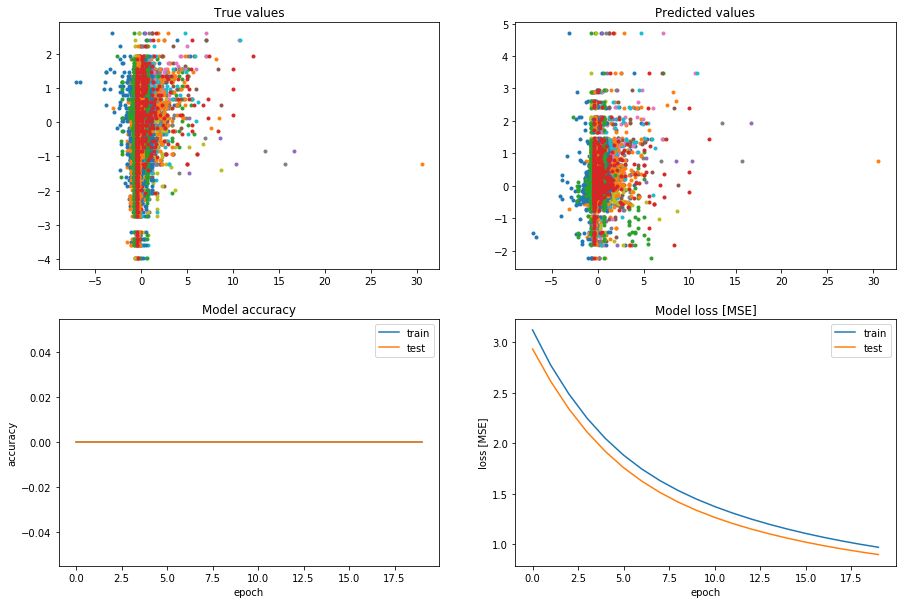

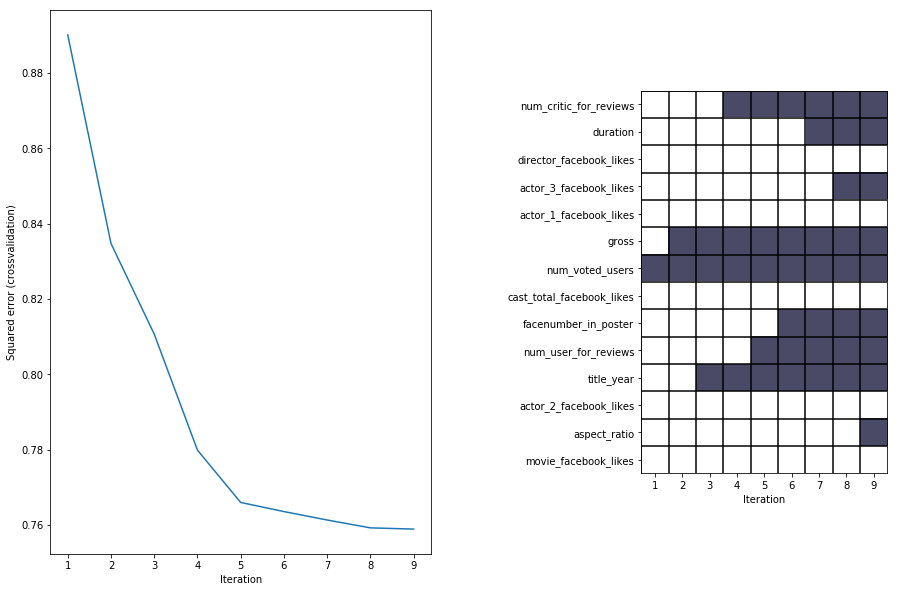

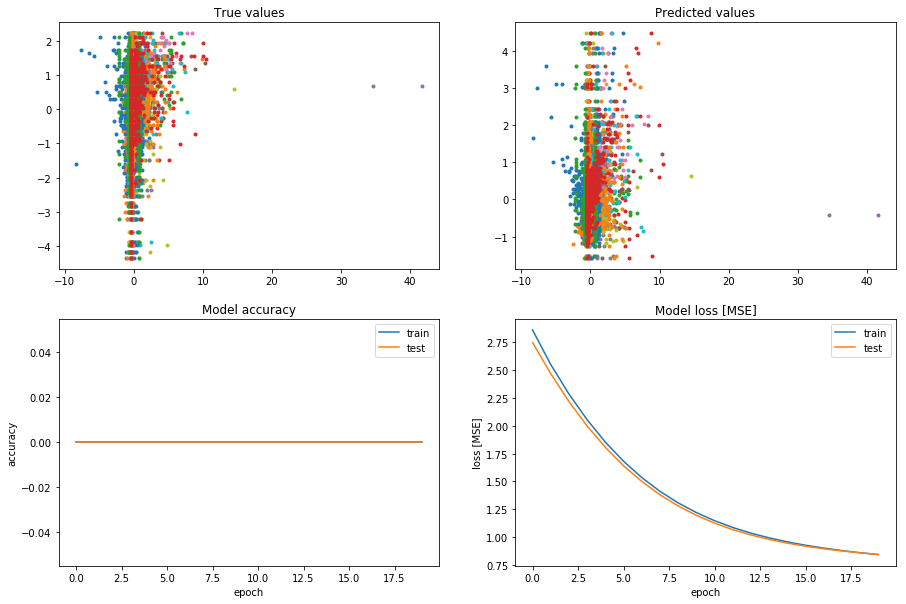

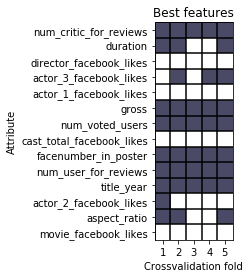

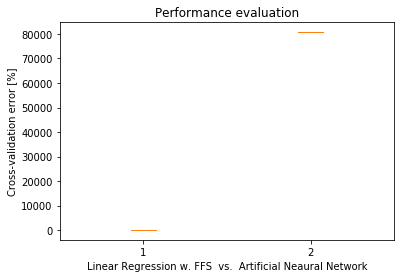

In [21]:
# Plot imports
import matplotlib.pyplot as plt

# Linear Regression and Forward Feature Selection imports
from toolbox_02450 import feature_selector_lr, bmplot
from sklearn import cross_validation
import sklearn.linear_model as lm

# ANN imports
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

# Statistical computing imports
from scipy import stats

# Debug imports
from datetime import datetime

# Size of input data for use in cross validation
N, M = X.shape

# Number of folds
K = 5
CV = cross_validation.KFold(N, K, shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
# Variables for paired t-test
Error_LM = np.empty((K,1))
Error_ANN = np.empty((K,1))

# SKRIV HER
k = 0
for train_index, test_index in CV:
    
    # TIMESTAMP (debug)
    print("DEBUG - TIMESTAMP: {0} - CV: {1}/{2}".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), k+1, K))
    
    # Extract training and test set for current CV fold
    X_train = X.values[train_index,:]
    y_train = y.values[train_index]
    X_test = X.values[test_index,:]
    y_test = y.values[test_index]
    
    ### LINEAR MODEL w. FFS ###
    
    # Cross validation folds for feature selection
    internal_cross_validation = 2
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]
    print("DEBUG - TIMESTAMP: {} - Squared error no input done!".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
    
    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]
    print("DEBUG - TIMESTAMP: {} - Squared error all input done!".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
    
    # Compute squared error with feature subset selection
    textout = '';
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    print("DEBUG - TIMESTAMP: {} - Features selected".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
    
    Features[selected_features,k]=1
    
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m_LM = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m_LM.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m_LM.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
        y_LM = m_LM.predict(X_test[:,selected_features]).sum()/y_test.shape[0]
        Error_LM[k] = 100*(y_LM!=y_test).sum().astype(float)/len(y_test)
        print("DEBUG - TIMESTAMP: {} - Model trained using Linear Regression with forward feature selection".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
        
        plt.figure(k, figsize=(15,10))
        plt.subplot(1,2,1)
        plt.plot(range(1,len(loss_record)), loss_record[1:])
        plt.xlabel('Iteration')
        plt.ylabel('Squared error (crossvalidation)')    
        
        plt.subplot(1,3,3)
        bmplot(X.columns.values, range(1,features_record.shape[1]), -features_record[:,1:])
        plt.clim(-1.5,0)
        plt.xlabel('Iteration')

    #print('Cross validation fold {0}/{1}'.format(k+1,K))
    #print('Train indices: {0}'.format(train_index))
    #print('Test indices: {0}'.format(test_index))
    #print('Features no: {0}\n'.format(selected_features.size))
    

    ### Artificial Neural Network Model ###
    
    # Create model
    m_ANN = Sequential()
    m_ANN.add(Dense(10, activation='linear', input_dim=X_train.shape[1],))
    m_ANN.add(Dense(1, activation='linear'))

    # Compile model
    adam = optimizers.Adam(lr=0.001,
                           beta_1=0.9,
                           beta_2=0.999,
                           epsilon=1e-08,
                           decay=0.0)
    m_ANN.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

    # Fit model
    history = m_ANN.fit(X_train,y_train,
                        validation_data=(X_test,y_test),
                        epochs = 20,
                        batch_size=500,
                        shuffle=False)

    # Evaluate model and calculate 
    y_ANN = m_ANN.predict(X_test, batch_size = 1000)
    Error_ANN[k] = 100*(y_ANN!=y_test).sum().astype(float)/len(y_test)
    print("DEBUG - TIMESTAMP: {} - Model trained using ANN".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
    
    # True values plot
    plt.figure(k+10, figsize=(15,10))
    plt.subplot(2,2,1)
    plt.plot(X_test, y_test, ls='', marker='.');
    plt.title('True values');

    # Predicted values plot
    plt.subplot(2,2,2)
    plt.plot(X_test, y_ANN, ls='', marker='.');
    plt.title('Predicted values');

    # Visualize accuracy performance
    plt.subplot(2,2,3)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

    # Visualize loss performance (MSE)
    plt.subplot(2,2,4)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss [MSE]')
    plt.ylabel('loss [MSE]')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

    k+=1
    
# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

# Plot best features each CV fold
plt.figure(k+199)
plt.subplot(1,3,2)
bmplot(X.columns.values, range(1,Features.shape[1]+1), -Features)
plt.clim(-1.5,0)
plt.title('Best features')
plt.xlabel('Crossvalidation fold')
plt.ylabel('Attribute')
    
# Boxplot to compare classifier error distributions
plt.figure(k+200)
plt.boxplot(np.bmat('Error_LM, Error_ANN'))
plt.title('Performance evaluation')
plt.xlabel('Linear Regression w. FFS  vs.  Artificial Neaural Network')
plt.ylabel('Cross-validation error [%]')

plt.show()

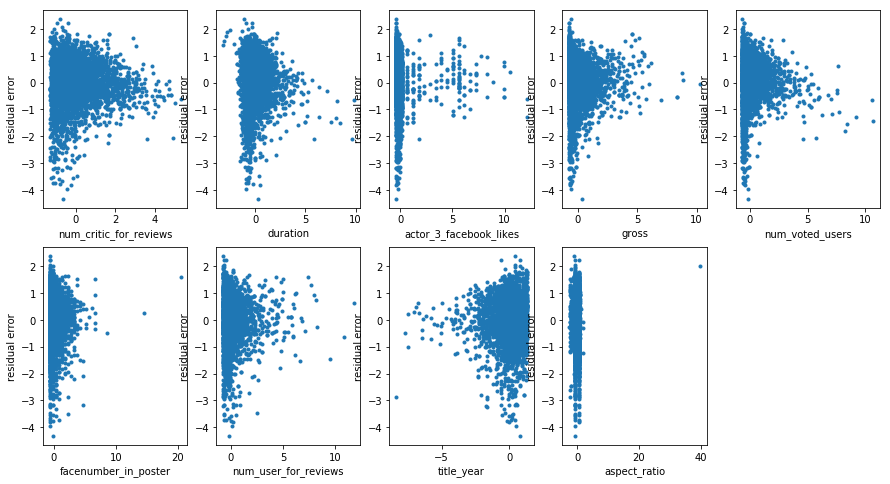

In [39]:
f=2 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) is 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.LinearRegression(fit_intercept=True).fit(X.iloc[:,ff], y)
    
    y_est= m.predict(X.iloc[:,ff])
    residual=y-y_est
    
    plt.figure(k+1, figsize=(15,8))
    plt.title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)):
        plt.subplot(2,np.ceil(len(ff)/2.0),i+1)
        plt.plot(X.iloc[:,ff[i]],residual,'.')
        plt.xlabel(X.columns[ff[i]])
        plt.ylabel('residual error')
    plt.show()

## Explain how a new observation is predicted
- Normalize

## Neural network model fitting

## Performance evalutation
Neural network vs. linear regression
- Use a paired t-test as described in lesson 6

In [42]:
LM_test = Error_LM
ANN_test = Error_ANN
[tstatistic, pvalue] = stats.ttest_ind(LM_test,ANN_test)
alpha = 0.05
if pvalue <= alpha:
    print('Classifiers are not significantly different')        
else:
    print('Classifiers are significantly different.')

Classifiers are not significantly different


# exercise 6.3.1

from matplotlib.pyplot import figure, boxplot, xlabel, ylabel, show
import numpy as np
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import cross_validation, tree
from scipy import stats

# Load Matlab data file and extract variables of interest
mat_data = loadmat('../Data/wine2.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = cross_validation.KFold(N,K,shuffle=True)
#CV = cross_validation.StratifiedKFold(y.A.ravel(),k=K)

# Initialize variables
Error_logreg = np.empty((K,1))
Error_dectree = np.empty((K,1))
n_tested=0

k=0
for train_index, test_index in CV:
    print('CV-fold {0} of {1}'.format(k+1,K))
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # Fit and evaluate Logistic Regression classifier
    model = lm.logistic.LogisticRegression(C=N)
    model = model.fit(X_train, y_train)
    y_logreg = model.predict(X_test)
    Error_logreg[k] = 100*(y_logreg!=y_test).sum().astype(float)/len(y_test)
    
    # Fit and evaluate Decision Tree classifier
    model2 = tree.DecisionTreeClassifier()
    model2 = model2.fit(X_train, y_train)
    y_dectree = model2.predict(X_test)
    Error_dectree[k] = 100*(y_dectree!=y_test).sum().astype(float)/len(y_test)

    k+=1

# Test if classifiers are significantly different using methods in section 9.3.3
# by computing credibility interval. Notice this can also be accomplished by computing the p-value using
# [tstatistic, pvalue] = stats.ttest_ind(Error_logreg,Error_dectree)
# and test if the p-value is less than alpha=0.05. 
z = (Error_logreg-Error_dectree)
zb = z.mean()
nu = K-1
sig =  (z-zb).std()  / (K-1)
alpha = 0.05

zL = zb + sig * stats.t.ppf(alpha/2, nu);
zH = zb + sig * stats.t.ppf(1-alpha/2, nu);

if zL <= 0 and zH >= 0 :
    print('Classifiers are not significantly different')        
else:
    print('Classifiers are significantly different.')
    
# Boxplot to compare classifier error distributions
figure()
boxplot(np.bmat('Error_logreg, Error_dectree'))
xlabel('Logistic Regression   vs.   Decision Tree')
ylabel('Cross-validation error [%]')

show()

from toolbox_02450 import feature_selector_lr, bmplot
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim, title
from sklearn import cross_validation
import sklearn.linear_model as lm
from datetime import datetime

## K-fold Cross validation for evaluating

# Size of input data for use in cross validation
N_row, M_row = X_row.shape
N_col, M_col = X_col.shape

# Number of folds
K = 5
CV_row = cross_validation.KFold(N_row, K, shuffle=True)
CV_col = cross_validation.KFold(N_col, K, shuffle=True)

# Initialize variables
Features_row = np.zeros((M_row,K))
Error_train_row = np.empty((K,1))
Error_test_row = np.empty((K,1))
Error_train_fs_row = np.empty((K,1))
Error_test_fs_row = np.empty((K,1))
Error_train_nofeatures_row = np.empty((K,1))
Error_test_nofeatures_row = np.empty((K,1))
k_row = 0

# Initialize variables
Features_col = np.zeros((M_col,K))
Error_train_col = np.empty((K,1))
Error_test_col = np.empty((K,1))
Error_train_fs_col = np.empty((K,1))
Error_test_fs_col = np.empty((K,1))
Error_train_nofeatures_col = np.empty((K,1))
Error_test_nofeatures_col = np.empty((K,1))
k_col = 0


# Model evaluation with dataset containing all columns
for train_index, test_index in CV_row:
    
    # TIMESTAMP (debug)
    print("row data - TIMESTAMP: {}".format(datetime.now()))
    
    # Extract training and test set for current CV fold
    X_train = X_row.values[train_index,:]
    y_train = y_row.values[train_index]
    X_test = X_row.values[test_index,:]
    y_test = y_row.values[test_index]
    
    # Cross validation folds for feature selection
    internal_cross_validation = 10
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures_row[k_row] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures_row[k_row] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]
    
    # Compute squared error with all features selected (no feature selection)
    model = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train_row[k_row] = np.square(y_train-model.predict(X_train)).sum()/y_train.shape[0]
    Error_test_row[k_row] = np.square(y_test-model.predict(X_test)).sum()/y_test.shape[0]
    
    # Compute squared error with feature subset selection
    textout = '';
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    
    Features_row[selected_features,k_row]=1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        model = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs_row[k_row] = np.square(y_train-model.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs_row[k_row] = np.square(y_test-model.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
        
        # DEBUG
        print("Modelled trained - row data - fold: {0}) - TIMESTAMP: {1}".format(k_row+1, datetime.now()))
        
        figure(k_row)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')    
        
        subplot(1,3,3)
        bmplot(X_row.columns.values, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k_row+1,K))
    print('Train indices: {0}'.format(train_index))
    print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k_row += 1
    
# Model evaluation with dataset containing all columns
for train_index, test_index in CV_col:
    
    # DEBUG
    print("col data - TIMESTAMP: {}".format(datetime.now()))
    
    # Extract training and test set for current CV fold
    X_train = X_col.values[train_index,:]
    y_train = y_col.values[train_index]
    X_test = X_col.values[test_index,:]
    y_test = y_col.values[test_index]
    
    # Cross validation folds for feature selection
    internal_cross_validation = 10
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures_col[k_col] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures_col[k_col] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]
    
    # Compute squared error with all features selected (no feature selection)
    model = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train_col[k_col] = np.square(y_train-model.predict(X_train)).sum()/y_train.shape[0]
    Error_test_col[k_col] = np.square(y_test-model.predict(X_test)).sum()/y_test.shape[0]
    
    # Compute squared error with feature subset selection
    textout = '';
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    
    Features_col[selected_features,k_col]=1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        model = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs_col[k_col] = np.square(y_train-model.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs_col[k_col] = np.square(y_test-model.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
        
        # DEBUG
        print("Modelled trained - col data - fold: {0}) - TIMESTAMP: {1}".format(k_col+1, datetime.now()))
        
        figure(k_col)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')    
        
        subplot(1,3,3)
        bmplot(X_row.columns.values, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k_col+1,K))
    print('Train indices: {0}'.format(train_index))
    print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k_col += 1
    
# Display results
print('\nALL COLUMNS\n\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train_row.mean()))
print('- Test error:     {0}'.format(Error_test_row.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures_row.sum()-Error_train_row.sum())/Error_train_nofeatures_row.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures_row.sum()-Error_test_row.sum())/Error_test_nofeatures_row.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs_row.mean()))
print('- Test error:     {0}'.format(Error_test_fs_row.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures_row.sum()-Error_train_fs_row.sum())/Error_train_nofeatures_row.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures_row.sum()-Error_test_fs_row.sum())/Error_test_nofeatures_row.sum()))

figure(k_row)
subplot(1,3,2)
bmplot(X_row.columns.values, range(1,Features_row.shape[1]+1), -Features_row)
clim(-1.5,0)
title('Best features (row data)')
xlabel('Crossvalidation fold')
ylabel('Attribute')

print('\n\nDROPPED TWO COLUMNS\n\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train_col.mean()))
print('- Test error:     {0}'.format(Error_test_col.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures_col.sum()-Error_train_col.sum())/Error_train_nofeatures_col.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures_col.sum()-Error_test_col.sum())/Error_test_nofeatures_col.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs_col.mean()))
print('- Test error:     {0}'.format(Error_test_fs_col.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures_col.sum()-Error_train_fs_col.sum())/Error_train_nofeatures_col.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures_col.sum()-Error_test_fs_col.sum())/Error_test_nofeatures_col.sum()))

figure(k_col)
subplot(1,3,2)
bmplot(X_col.columns.values, range(1,Features_col.shape[1]+1), -Features_col)
clim(-1.5,0)
title('Best features (col data)')
xlabel('Crossvalidation fold')
ylabel('Attribute')

# Classification

## Problem formulation
Describe the problem you want to solve.

## Apply three of the given methods
Two level cross validation

## Explain how a new observation is classified

## Performance evaluation